<a href="https://colab.research.google.com/github/mjg1000/mjg1000.github.io/blob/main/personal/AI/Emotional_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

open anaconda type: activate tf jupyter notebook

on page that opens, click new, click terminal

type: jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8889 --NotebookApp.port_retries=0 get the url output copy and paste into reconnect > local runtime in google colab

In [ ]:
#emotional recognition using keras
import tensorflow as tf 
import numpy as np 
import keras
import pandas as pd 

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

#get datasets 
#happy dataset is from the file: C:\Users\mjgar\Downloads\imgs\Positive or Happy or Joyfull
#sad dataset is from the file: C:\Users\mjgar\Downloads\imgs\Melancholy or Apathetic or Sad
#neutral dataset is from the file: C:\Users\mjgar\Downloads\imgs\Neutral

train_set = keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\mjgar\\Downloads\\me',
    validation_split=0.2,
    subset="training",
    seed=1,
    color_mode="grayscale",
    shuffle=True,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))


validation_set = keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\mjgar\\Downloads\\me',
    validation_split=0.2,
    subset="validation",
    seed=1,
    color_mode="grayscale",
    shuffle=True,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

#shuffle the datasets 
train_set = train_set.shuffle(buffer_size=1000)
print("_________")
print(train_set)
#split dataset 




Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:07:00.0, compute capability: 8.6

Found 3421 files belonging to 2 classes.
Using 2737 files for training.
Found 3421 files belonging to 2 classes.
Using 684 files for validation.
_________
<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [ ]:
import tensorflow as tf 
import numpy as np 
import keras
import pandas as pd 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:07:00.0, compute capability: 8.6



In [ ]:
#import kerastuner
def conv_dropout(model):
  model.add(keras.layers.AveragePooling2D(pool_size=(3,3)))
  model.add(keras.layers.UpSampling2D(size=(3,3)))
  model.add(keras.layers.Dropout(0.3))
def build_model():
  model = keras.Sequential()
  activ = "elu"
  model.add(keras.layers.Input(shape=(256, 256, 1)))
  model.add(keras.layers.BatchNormalization())
  for i in range(4):
    if i == 0:
      model.add(keras.layers.Conv2D(filters=16, kernel_size=(10, 5), activation=activ))
    else:
      model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 2), activation=activ))
    
    model.add(keras.layers.AveragePooling2D(pool_size=(3,3)))
    if i > 1:
      model.add(keras.layers.UpSampling2D(size=(3,3)))
    #conv_dropout(model)
    model.add(keras.layers.Dropout(0.65))
  model.add(keras.layers.Flatten())
  for i in range(6):
    model.add(keras.layers.Dense(120, activation=activ))
    model.add(keras.layers.Dropout(0.65))
  model.add(keras.layers.Dense(60, activation=activ)) 
  model.add(keras.layers.Dense(30, activation=activ)) 
  model.add(keras.layers.Dense(10,activation=activ))
  model.add(keras.layers.Dense(2, activation='sigmoid'))
  model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])
  return model
model = build_model()

In [ ]:
model.save_weights('')

In [ ]:
model.load_weights('./best')


In [ ]:
model.fit(train_set,validation_data=validation_set, epochs=250, shuffle=True,batch_size=32) 

Epoch 1/250
86/86 [==============================] - 6s 45ms/step - loss: 1.0792 - accuracy: 0.4932 - precision: 0.5013 - recall: 0.2163 - val_loss: 0.7061 - val_accuracy: 0.4708 - val_precision: 0.4747 - val_recall: 0.5760
Epoch 2/250
86/86 [==============================] - 4s 39ms/step - loss: 1.0663 - accuracy: 0.5013 - precision: 0.5082 - recall: 0.2368 - val_loss: 0.7025 - val_accuracy: 0.4576 - val_precision: 0.4974 - val_recall: 0.7061
Epoch 3/250
86/86 [==============================] - 4s 39ms/step - loss: 1.0189 - accuracy: 0.4914 - precision: 0.4996 - recall: 0.2232 - val_loss: 0.7006 - val_accuracy: 0.4591 - val_precision: 0.5009 - val_recall: 0.8041
Epoch 4/250
86/86 [==============================] - 4s 39ms/step - loss: 0.9941 - accuracy: 0.5053 - precision: 0.5109 - recall: 0.2400 - val_loss: 0.6999 - val_accuracy: 0.4576 - val_precision: 0.4926 - val_recall: 0.8304
Epoch 5/250
86/86 [==============================] - 4s 40ms/step - loss: 0.9888 - accuracy: 0.4929 - pr

KeyboardInterrupt: ignored

binary accuracy: 0.5189
accuracy: 0.5751
Accuracy: 0.6053
categorical accuracy: 0.5999
mae: 0.5
precision:0.5655 (judge accuracy is 0.5)

In [ ]:
model.evaluate(validation_set) #this was the result for the best so far

22/22 [==============================] - 21s 20ms/step - loss: 0.2308 - accuracy: 0.8830 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.23079851269721985, 0.8830409646034241, 0.0, 0.0]

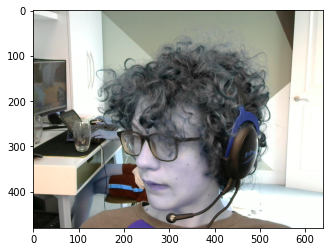

In [ ]:
#Logic functs  
from re import L
import cv2
import numpy as np 
import time
import tensorflow as tf 
import keras 
from matplotlib import pyplot as plt

#wait for 3 seconds
def wait():
    time.sleep(3)
#get an image from the web cam
def get_image():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    #check if frame is valid 
    if not ret:
        print("Error opening the camera")
        return None

    cap.release()
    return frame
#display the image
def display_image(img):
    plt.imshow(img)
    cv2.waitKey(3000)
    cv2.destroyAllWindows()
display_image(get_image())

In [ ]:
#logic 
#fill scores with 30 0s
import winsound
import time
import random

freq = 200 
duration = 300  
scores = []
last = 0
for i in range(6):
    scores.append(0)
score1 = 0
scores1 = []
scores2 = [] 
score2 = 0
count = 0
#loop 100 times, get image, display image, get user input, wait 3 seconds
while True:
    img = get_image()
    img = cv2.resize(img,(256,256),interpolation =cv2.INTER_NEAREST)
    img = img[:,:,0]
    print(img.shape)
    score_for1 = model.predict(np.expand_dims(img, axis=0))
    if score_for1[0][0] > score_for1[0][1] and score_for1[0][0] > 1e-3:
      scores.append(1)
      print("good for 1")
    elif score_for1[0][0] > score_for1[0][1] and score_for1[0][0] > 1e-5:
      scores.append(0.5)
      print("half good for 1")
    else:
        scores.append(-1)
    del scores[0]
    if scores.count(1)+0.5*scores.count(0.5) >= 2.5:
      
        print("Happy")
        if time.time() - last > 10:
          winsound.Beep(freq, duration)
          last = time.time()
    elif scores.count(1) > 3:
        print("Happy")
        if time.time() - last > 10:
          winsound.Beep(freq, duration)
          last = time.time()    
    else:
        print("Neutral")
    print(score_for1)
    print(score_for1[0][0]+score_for1[0][1])
    

Streaming output truncated to the last 5000 lines.
(256, 256)
1/1 [==============================] - 0s 18ms/step
half good for 1
Happy
[[4.6415706e-04 1.1183092e-05]]
0.00047534014
(256, 256)
1/1 [==============================] - 0s 17ms/step
half good for 1
Happy
[[4.6343182e-04 1.1155770e-05]]
0.00047458758
(256, 256)
1/1 [==============================] - 0s 17ms/step
half good for 1
Happy
[[4.6257538e-04 1.1125438e-05]]
0.0004737008
(256, 256)
1/1 [==============================] - 0s 17ms/step
half good for 1
Happy
[[4.6538579e-04 1.1232752e-05]]
0.00047661853
(256, 256)
1/1 [==============================] - 0s 17ms/step
half good for 1
Happy
[[4.6324340e-04 1.1151399e-05]]
0.0004743948
(256, 256)
1/1 [==============================] - 0s 17ms/step
half good for 1
Happy
[[4.6404489e-04 1.1180501e-05]]
0.0004752254
(256, 256)
1/1 [==============================] - 0s 18ms/step
half good for 1
Happy
[[4.6307518e-04 1.1147528e-05]]
0.0004742227
(256, 256)
1/1 [====================

In [ ]:

while True:
    if count > 600: 
      count = 0
      print(score1)
      print(score2)
      winsound.Beep(400, duration)
      plt.scatter(scores1,scores2)
      plt.show()
      scores1 = [] 
      scores2 = [] 
    count += 1 
    img = get_image()
    img = cv2.resize(img,(256,256),interpolation =cv2.INTER_NEAREST)
    img = img[:,:,0]
    score_for1 = model.predict(np.expand_dims(img, axis=0))
    score1 = score1*(count-1) 
    score1 += score_for1[0][0]
    score1 = score1/count 
    score2 = score2*(count-1)
    score2 += score_for1[0][0]
    score2 = score2/count
    scores1.append(score_for1[0][0]) 
    scores2.append(score_for1[0][1]) 


1/1 [==============================] - 0s 21ms/step


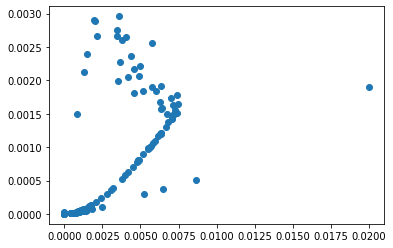

1.386
0.014


In [ ]:
import cv2
from matplotlib import pyplot as plt

scores1 = []
scores2 = [] 
store = 0
store2 = 0 
for i in range(1400):
  dir = str('C:\\Users\\mjgar\\Downloads\\me\\Happy\\happy_pic'+str(i)+'.jpg')
  image = cv2.imread(dir)
  image = cv2.resize(image,(256,256),interpolation =cv2.INTER_NEAREST)
  image = image[:,:,0]
  res = model.predict(np.expand_dims(image, axis=0))
  if res[0][0] > res[0][1]:
    store += 1 
  else: 
    store2 += 1
  scores1.append(res[0][0]) 
  scores2.append(res[0][1]) 
plt.scatter(scores1,scores2)
plt.show()
store = store/1000
store2 = store2/1000
print(store)
print(store2)

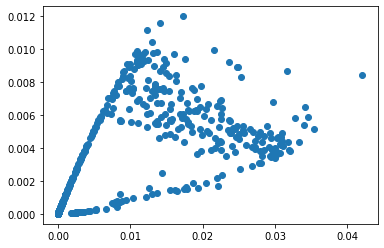

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(scores1,scores2)
plt.show()

In [ ]:
res

array([[0.46867797, 0.57882506]], dtype=float32)

In [ ]:
model.predict(validation_set[0])

TypeError: ignored

In [ ]:
import kerastuner
tuner = kerastuner.RandomSearch(build_model,objective="val_accuracy",max_trials=10,executions_per_trial=2,project_name="emotional_recog",directory='./new_7directory9') 
tuner.search(train_set,validation_data=validation_set,epochs=15,batch_size=32)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
categorical_acc...|?                 |metrics

Epoch 1/15
228/228 [==============================] - 28s 57ms/step - loss: 0.7189 - categorical_accuracy: 0.5096 - val_loss: 0.6965 - val_categorical_accuracy: 0.5030
Epoch 2/15
228/228 [==============================] - 14s 47ms/step - loss: 0.7000 - categorical_accuracy: 0.5121 - val_loss: 0.6960 - val_categorical_accuracy: 0.5471
Epoch 3/15
228/228 [==============================] - 14s 47ms/step - loss: 0.6973 - categorical_accuracy: 0.5292 - val_loss: 0.6911 - val_categorical_accuracy: 0.5515
Epoch 4/15
228/228 [==============================] - 14s 47ms/step - loss: 0.6891 - categorical_accuracy: 0.5440 - val_loss: 0.6850 - val_categorical_accuracy: 0.5625
Epoch 5/15
228/228 [==============================] - 13s 46ms/step - loss: 0.6896 - categorical_accuracy: 0.5414 - val_loss: 0.6879 - val_categorical_accuracy: 0.5427
Epoch 6/15
228/228 [=============

KeyError: ignored

In [ ]:
best_model = tuner.get_best_models()[0]
tuner.results_summary()
best_model.summary()

Results summary
Results in ./new_7directory6\emotional_recog
Showing 10 best trials
Trial summary
Hyperparameters:
activation: elu
Score: 0.6088791092236837
Trial summary
Hyperparameters:
activation: relu
Score: 0.6028251647949219
Trial summary
Hyperparameters:
activation: selu
Score: 0.5932856400807699
Trial summary
Hyperparameters:
activation: softsign
Score: 0.5786094466845194
Trial summary
Hyperparameters:
activation: sigmoid
Score: 0.5008255243301392
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 247, 252, 16)      2416      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 126, 16)     0  

In [ ]:

#save the model 
model.save('emotion_mode_usingprecision.h5')
#load the model 
model = keras.models.load_model('emotion_model.h5')
